In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import glob
import os
import numpy as np
from PIL import Image
import torchvision.models as models
import copy
from torchvision.utils import save_image
import PIL
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold, datasets
import matplotlib

In [2]:
vgg19_bn = models.vgg19_bn(pretrained=True)

def getLabelAndIndexFromFileName(fn):
    _fn = fn.split('/').pop()
    _list = _fn.split("_")
    label = int(_list[0])
    index = int(_list[1].split(".")[0])
    return label, index

class imgData(Dataset):
    def __init__(self, root, transform = None):
        self.filenames = []
        self.root = root
        self.transform = transform
        filenames = glob.glob(os.path.join(self.root, '*.png'))
        for fn in filenames:
            label, index = getLabelAndIndexFromFileName(fn)
            self.filenames.append((fn, label)) # (filename, label) pair
        self.len = len(self.filenames) 
    
    def __getitem__(self, index):
        with torch.no_grad():
            fn, label = self.filenames[index]
            image = Image.open(fn)
            if self.transform is not None:
                image = self.transform(image)
            return image, label
    
    def __len__(self):
        return self.len

In [3]:
# activate cuda
use_cuda = torch.cuda.is_available()
torch.manual_seed(123)
device = torch.device("cuda:1" if use_cuda else "cpu")
#device = torch.device('cpu')
print('Device used:', device)
testset = imgData(root='hw2_data/p1_data/val_50', transform=transforms.ToTensor())
testset_loader = DataLoader(testset, batch_size=2500, shuffle=False, num_workers=0)

Device used: cuda:1


In [4]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.features = nn.Sequential(
            vgg19_bn
        )
        self.fc1 = nn.Sequential(
            nn.Linear(1000, 50)
        )
        
    def forward(self, x):
        x = self.features(x)
        x = self.fc1(x)
        return x

In [5]:
def load_checkpoint(checkpoint_path, model, optimizer):
    state = torch.load(checkpoint_path)
    model.load_state_dict(state['state_dict'])
    optimizer.load_state_dict(state['optimizer'])
    print('model loaded from %s' % checkpoint_path)
    
def getFeatureVectors(model):
    model.eval()  # Important: set evaluation mode
    featureTrans = model.features
    outputList = []
    labelList = []
    with torch.no_grad(): # This will free the GPU memory used for back-prop
        for data, target in testset_loader:
            data = data.to(device)
            output = featureTrans(data)
            outputList += output.cpu().numpy().tolist()
            labelList += target.cpu().numpy().tolist()
    return outputList, labelList

def plotTSNE(args):
    outputList = [ls[0] for ls in args]
    labelList = [ls[1] for ls in args]
    X_tsne = manifold.TSNE(n_components=2, init='random', random_state=5, verbose=1).fit_transform(outputList)
    #Data Visualization
    x_min, x_max = X_tsne.min(0), X_tsne.max(0)
    X_norm = (X_tsne - x_min) / (x_max - x_min)  #Normalize
    plt.figure(figsize=(8, 8))
    colors = ['red','orange','green','blue','purple','grey','black']
    while len(colors) < 50:
        colors +=  colors
    for i in range(X_norm.shape[0]):
        plt.text(X_norm[i, 0], X_norm[i, 1], str(labelList[i]), color=colors[labelList[i]], 
                 fontdict={'weight': 'bold', 'size': 9})
    plt.xticks([])
    plt.yticks([])
    plt.title('visualization result for class '+str(min(labelList))+'-'+str(max(labelList)))
    plt.show()
    

model loaded from p1_current_best-70.72.pth
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 250 samples in 0.008s...
[t-SNE] Computed neighbors for 250 samples in 0.078s...
[t-SNE] Computed conditional probabilities for sample 250 / 250
[t-SNE] Mean sigma: 59.166113
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.831001
[t-SNE] KL divergence after 1000 iterations: 0.630856


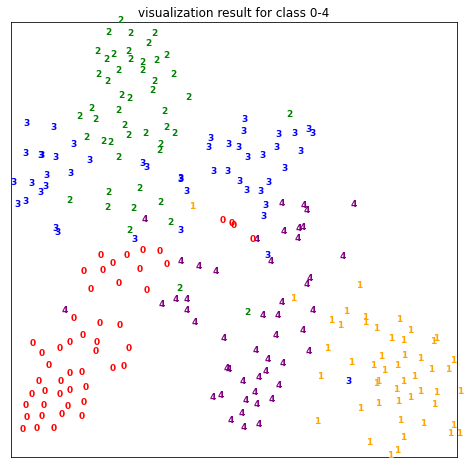

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 250 samples in 0.008s...
[t-SNE] Computed neighbors for 250 samples in 0.079s...
[t-SNE] Computed conditional probabilities for sample 250 / 250
[t-SNE] Mean sigma: 64.179413
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.344936
[t-SNE] KL divergence after 950 iterations: 0.414803


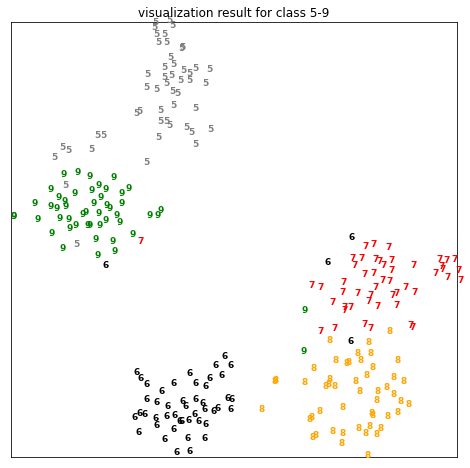

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 250 samples in 0.008s...
[t-SNE] Computed neighbors for 250 samples in 0.081s...
[t-SNE] Computed conditional probabilities for sample 250 / 250
[t-SNE] Mean sigma: 96.562197
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.695366
[t-SNE] KL divergence after 1000 iterations: 0.309623


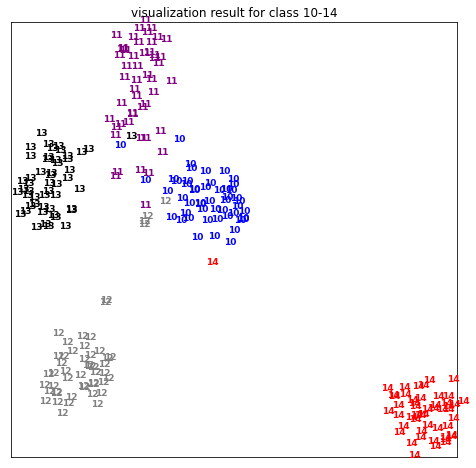

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 250 samples in 0.007s...
[t-SNE] Computed neighbors for 250 samples in 0.079s...
[t-SNE] Computed conditional probabilities for sample 250 / 250
[t-SNE] Mean sigma: 61.727683
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.797619
[t-SNE] KL divergence after 1000 iterations: 0.495453


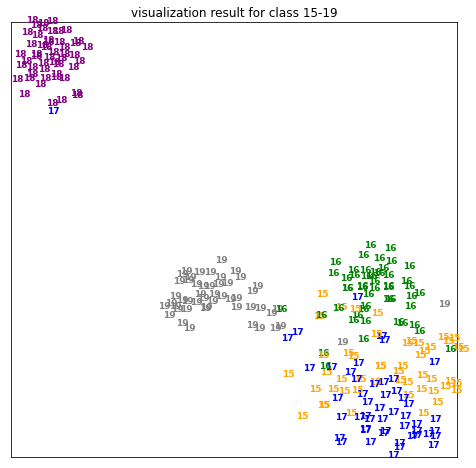

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 250 samples in 0.008s...
[t-SNE] Computed neighbors for 250 samples in 0.080s...
[t-SNE] Computed conditional probabilities for sample 250 / 250
[t-SNE] Mean sigma: 65.462030
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.762280
[t-SNE] KL divergence after 1000 iterations: 0.411032


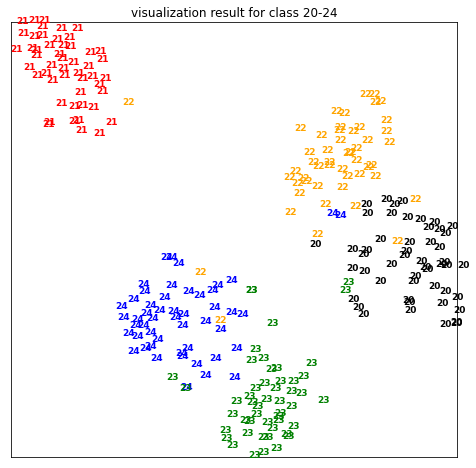

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 250 samples in 0.007s...
[t-SNE] Computed neighbors for 250 samples in 0.080s...
[t-SNE] Computed conditional probabilities for sample 250 / 250
[t-SNE] Mean sigma: 55.101476
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.845207
[t-SNE] KL divergence after 1000 iterations: 0.436050


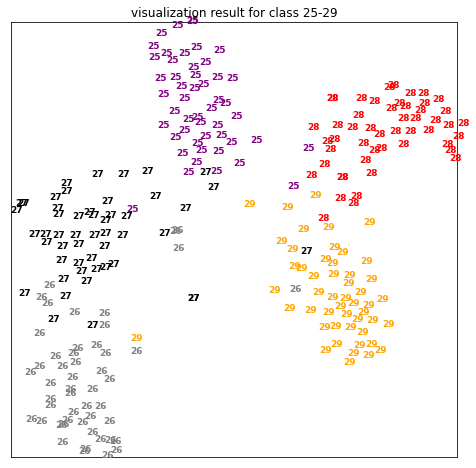

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 250 samples in 0.007s...
[t-SNE] Computed neighbors for 250 samples in 0.079s...
[t-SNE] Computed conditional probabilities for sample 250 / 250
[t-SNE] Mean sigma: 75.902377
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.941921
[t-SNE] KL divergence after 1000 iterations: 0.476625


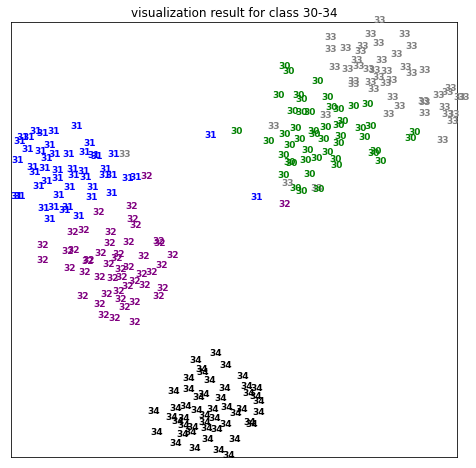

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 250 samples in 0.007s...
[t-SNE] Computed neighbors for 250 samples in 0.077s...
[t-SNE] Computed conditional probabilities for sample 250 / 250
[t-SNE] Mean sigma: 71.490186
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.371857
[t-SNE] KL divergence after 1000 iterations: 0.381397


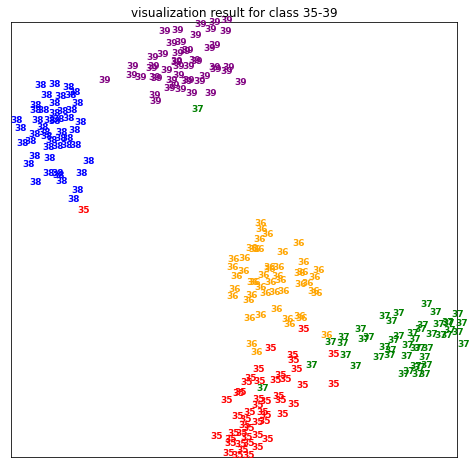

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 250 samples in 0.007s...
[t-SNE] Computed neighbors for 250 samples in 0.079s...
[t-SNE] Computed conditional probabilities for sample 250 / 250
[t-SNE] Mean sigma: 35.649087
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.649002
[t-SNE] KL divergence after 1000 iterations: 0.451275


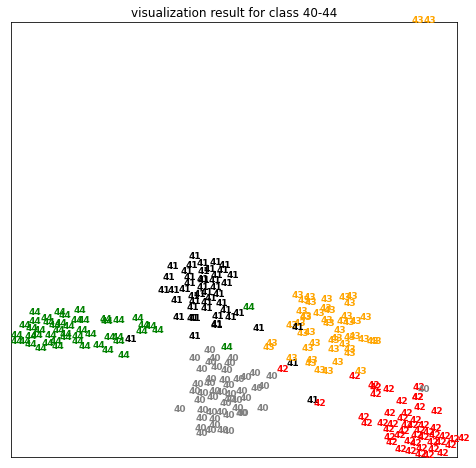

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 250 samples in 0.007s...
[t-SNE] Computed neighbors for 250 samples in 0.080s...
[t-SNE] Computed conditional probabilities for sample 250 / 250
[t-SNE] Mean sigma: 70.242684
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.712746
[t-SNE] KL divergence after 1000 iterations: 0.496122


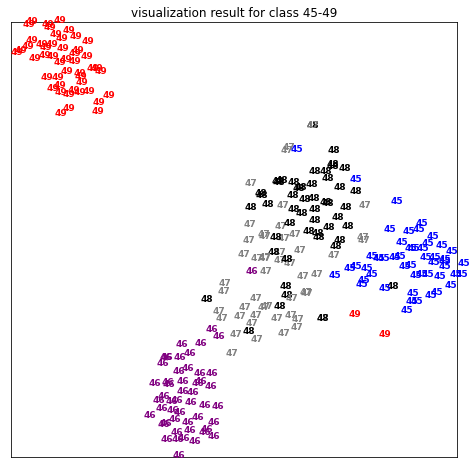

In [6]:
model = Net()
model.to(device)
optimizer = optim.SGD(model.parameters(), lr = 0.001, momentum = 0.9, weight_decay = 1e-3)
load_checkpoint('p1_current_best-70.72.pth', model, optimizer)
outputList, labelList = getFeatureVectors(model)

for j in range(10):
    label = range(j*5, j*5+5)
    tupleList = [(outputList[i], labelList[i]) for i in range(len(outputList)) if labelList[i] in label]
    plotTSNE(tupleList)